<a href="https://colab.research.google.com/github/Ji-samarth/GenAI_Capstone/blob/main/GenAI_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 2. Loading the Dataset
# Dataset URL (hosted on GitHub)
url="https://raw.githubusercontent.com/PALAK7890/GenAI_Capstone/refs/heads/main/credit_risk_dataset.csv"

In [ ]:
# Reading CSV file into pandas DataFrame
df=pd.read_csv(url)

In [ ]:
# Display first few rows to understand structure
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# 3. Basic Data Inspection
# Checking data types, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Checking target variable distribution
# This helps us understand class imbalance
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.781836
1,0.218164


<Axes: >

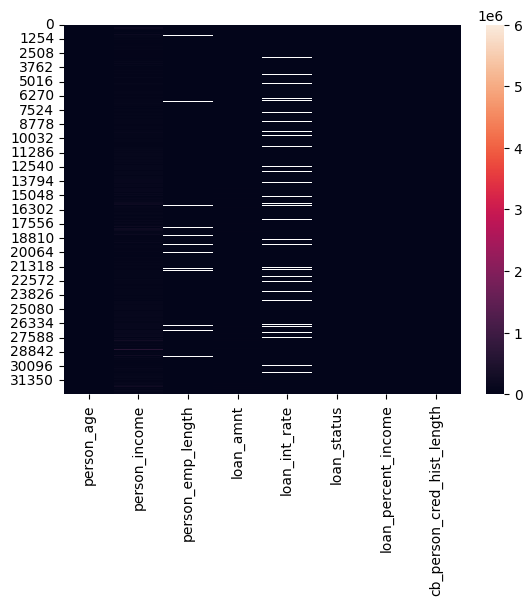

In [ ]:
# 4. Exploratory Data Analysis (EDA)
# Selecting only numerical columns for correlation analysis
num_df=df.select_dtypes(include='number')

# Visualizing correlation heatmap
# Helps identify multicollinearity and strong relationships
sns.heatmap(data=num_df)

In [ ]:
# 5. Handling Missing Values
# Checking missing values
df.isnull().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
# Filling missing employment length with median
# Median is robust to outliers
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

/tmp/ipython-input-258519556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)


In [ ]:
# Filling missing interest rate with median
df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)

/tmp/ipython-input-1722227870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<Axes: xlabel='loan_status', ylabel='count'>

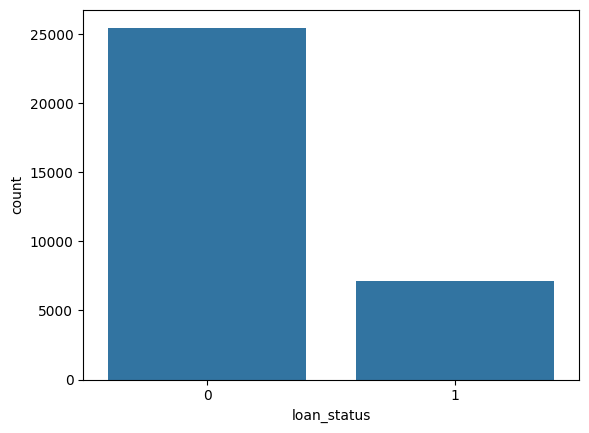

In [ ]:
sns.countplot(x='loan_status', data=df)

<Axes: xlabel='loan_status', ylabel='person_income'>

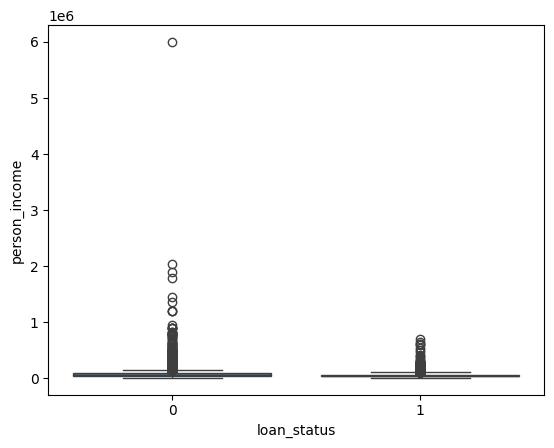

In [ ]:
sns.boxplot(x='loan_status', y='person_income', data=df)


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

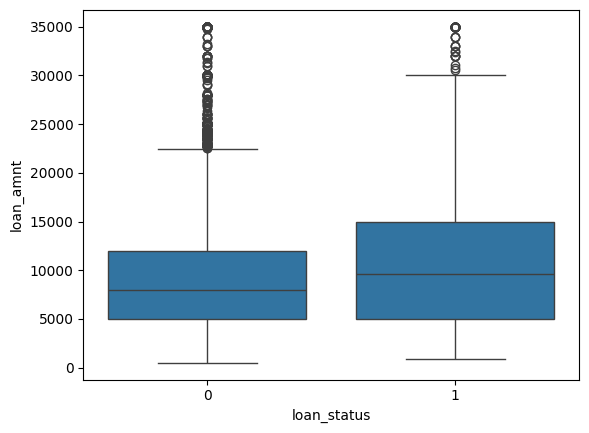

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)


<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

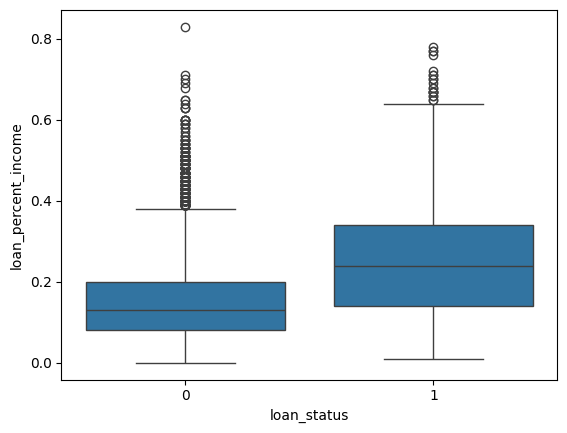

In [ ]:
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)

<Axes: xlabel='loan_grade', ylabel='loan_status'>

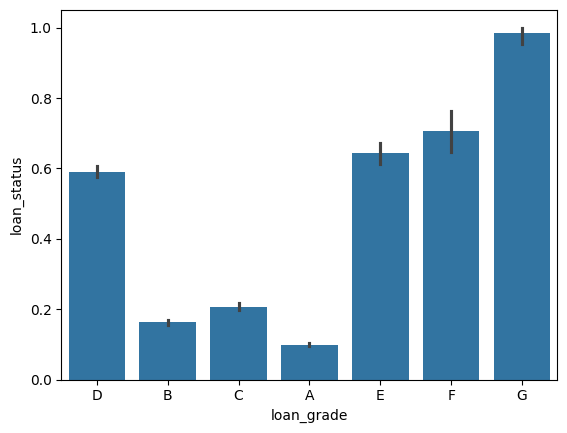

In [ ]:
sns.barplot(x='loan_grade', y='loan_status', data=df)

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

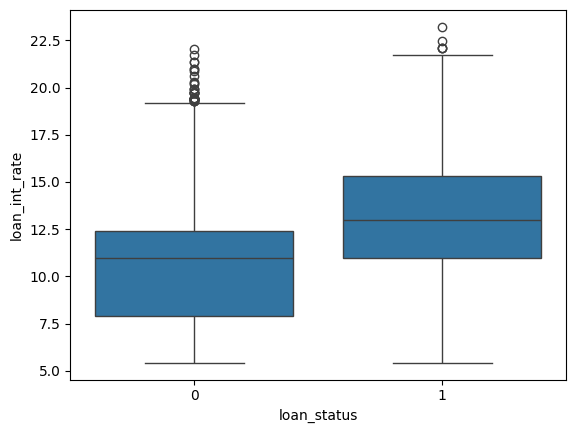

In [ ]:
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)

<Axes: >

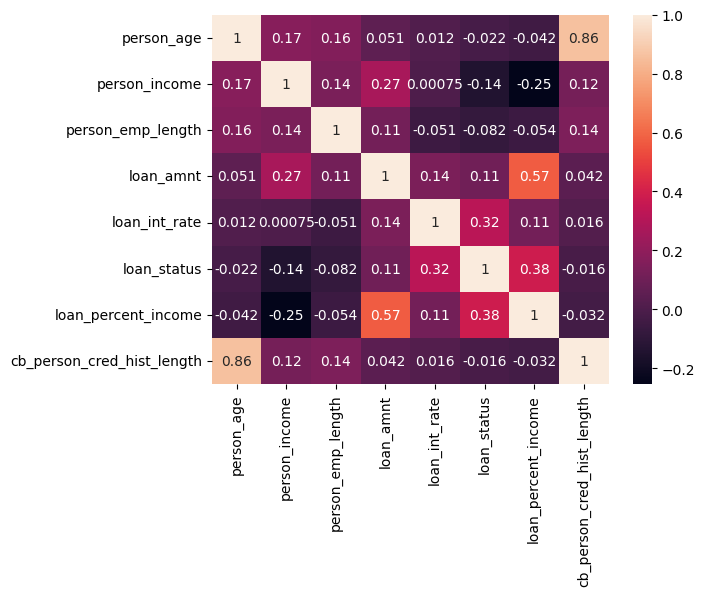

In [ ]:
num_col=df.select_dtypes(include='number')
sns.heatmap(data=num_col.corr(),annot=True)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
# 6. Encoding Categorical Variables

# Mapping loan grades (Ordinal encoding)
# Since A < B < C < ... < G
grade_mapping = {
    'A':1, 'B':2, 'C':3, 'D':4,
    'E':5, 'F':6, 'G':7
}

df['loan_grade'] = df['loan_grade'].map(grade_mapping)

In [ ]:
# Encoding default history (Binary encoding)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})

In [ ]:
# One-hot encoding nominal categorical variables
df = pd.get_dummies(
    df,
    columns=['person_home_ownership','loan_intent'],
    drop_first=True
)

In [ ]:
# Converting boolean columns to integer
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  int64  
 1   person_income                32581 non-null  int64  
 2   person_emp_length            32581 non-null  float64
 3   loan_grade                   32581 non-null  int64  
 4   loan_amnt                    32581 non-null  int64  
 5   loan_int_rate                32581 non-null  float64
 6   loan_status                  32581 non-null  int64  
 7   loan_percent_income          32581 non-null  float64
 8   cb_person_default_on_file    32581 non-null  int64  
 9   cb_person_cred_hist_length   32581 non-null  int64  
 10  person_home_ownership_OTHER  32581 non-null  int64  
 11  person_home_ownership_OWN    32581 non-null  int64  
 12  person_home_ownership_RENT   32581 non-null  int64  
 13  loan_intent_EDUC

In [ ]:
# 7. Splitting Features and Target
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [ ]:
# 8. Splitting Dataset into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

In [ ]:
# 9. Feature Scaling
# Standardization improves model convergence
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 10. Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
# Evaluation
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))



Logistic Regression Results
Accuracy: 0.8452000982077094


In [ ]:
# 11. Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)

tree_model.fit(X_train_scaled , y_train)

y_pred_tree = tree_model.predict(X_test_scaled)
y_prob_tree = tree_model.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_tree))



Accuracy: 0.9080530321630248


In [ ]:
print("Logistic ROC-AUC:", roc_auc_score(y_test, y_prob_log[:,1]))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob_tree))

Logistic ROC-AUC: 0.863563217940668
Decision Tree ROC-AUC: 0.9194612369150356


In [ ]:
# 12. Confusion Matrix & Classification Report
print("Confusion Matrix - Logistic")
print(confusion_matrix(y_test, y_pred_log))

print("Confusion Matrix - Tree")
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix - Logistic
[[5981  350]
 [ 911  904]]
Confusion Matrix - Tree
[[6006  325]
 [ 424 1391]]


<Axes: >

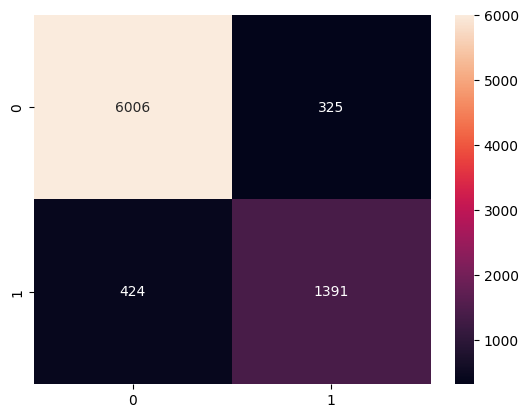

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6331
           1       0.81      0.77      0.79      1815

    accuracy                           0.91      8146
   macro avg       0.87      0.86      0.86      8146
weighted avg       0.91      0.91      0.91      8146



In [ ]:
# 13. Saving Trained Model
import joblib

joblib.dump(tree_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

In [ ]:
# ============================================
# 14. Testing Model with New Example
test_example = pd.DataFrame([{
    "person_age": 30,
    "person_income": 50000,
    "person_emp_length": 5,
    "loan_grade": 2,
    "loan_amnt": 15000,
    "loan_int_rate": 12.5,
    "loan_percent_income": 0.30,
    "cb_person_default_on_file": 0,
    "cb_person_cred_hist_length": 6,
    "person_home_ownership_OTHER": 0,
    "person_home_ownership_OWN": 0,
    "person_home_ownership_RENT": 1,
    "loan_intent_EDUCATION": 0,
    "loan_intent_HOMEIMPROVEMENT": 0,
    "loan_intent_MEDICAL": 0,
    "loan_intent_PERSONAL": 1,
    "loan_intent_VENTURE": 0
}])

# Predict
prediction = tree_model.predict(test_example)
probability = tree_model.predict_proba(test_example)

print("Predicted Class:", prediction[0])
print("Default Probability:", probability[0][1])

risk = probability[0][1]

if risk < 0.2:
    decision = "Approved"
elif risk < 0.5:
    decision = "Needs Review"
else:
    decision = "Rejected"

print("Decision:", decision)

Predicted Class: 0
Default Probability: 0.46488639425083433
Decision: Needs Review


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
